In [6]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import json

In [7]:
from shadow_detection import ShadowDetection

In [8]:
help(shadow_detection)

NameError: name 'shadow_detection' is not defined

In [4]:
bounding_boxes_groundtruth_path = "C:\\Users\\AISG\\Documents\\Jonas\\Helipad\\Real_World_Detected_Boxes\\model_10_0.0_groundtruth\\"

# Test of Method 3 on Detected Helipads in Manilla

Satellite_19_438227_283483_0.jpg


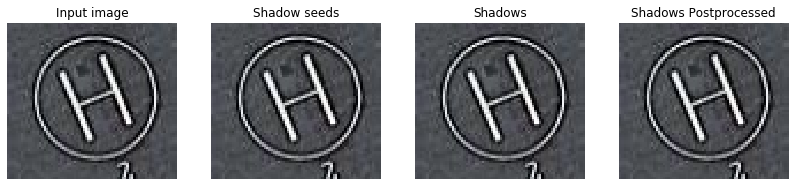

Satellite_19_438232_283485_0.jpg


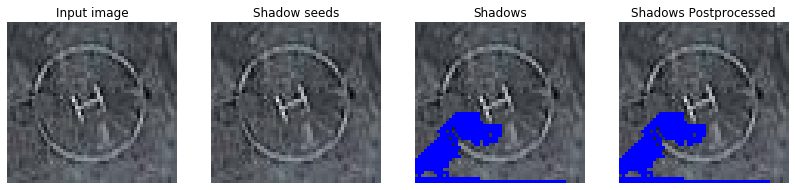

Satellite_19_438233_283485_0.jpg


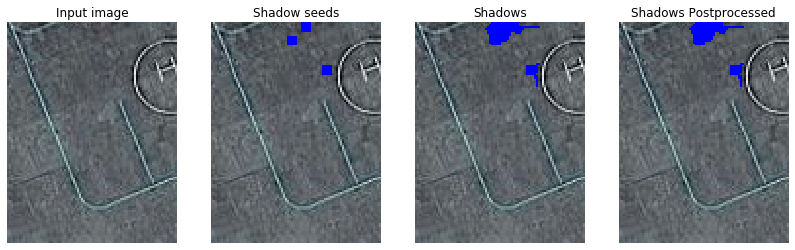

Satellite_19_438233_283486_0.jpg


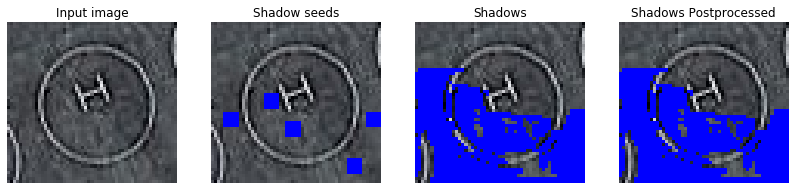

Satellite_19_438234_283483_0.jpg


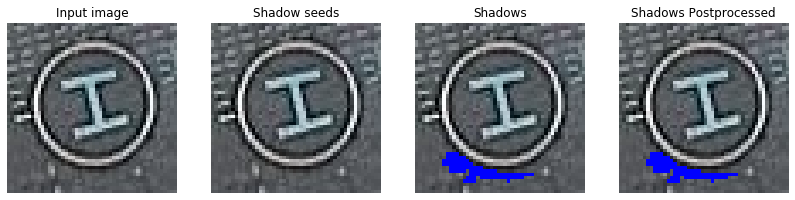

Satellite_19_438234_283485_0.jpg


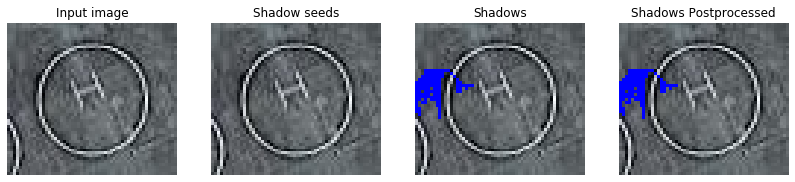

Satellite_19_438234_283486_0.jpg


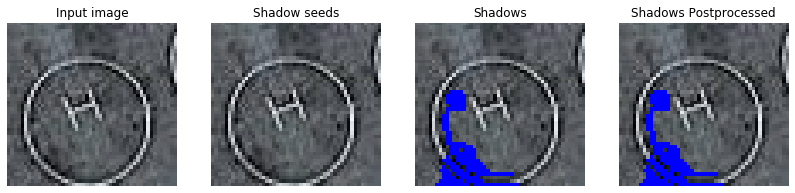

Satellite_19_438235_283483_0.jpg


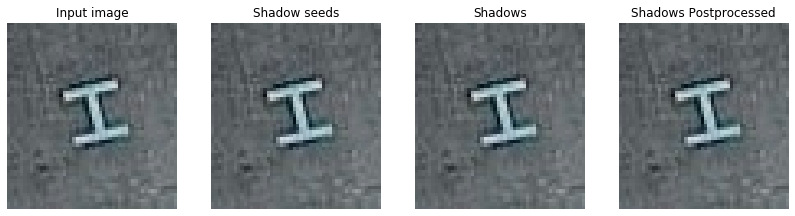

Satellite_19_438294_283934_0.jpg


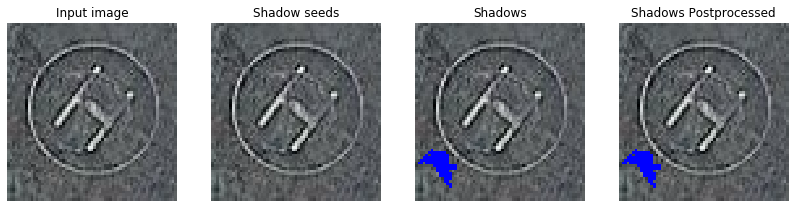

Satellite_19_438295_283926_0.jpg


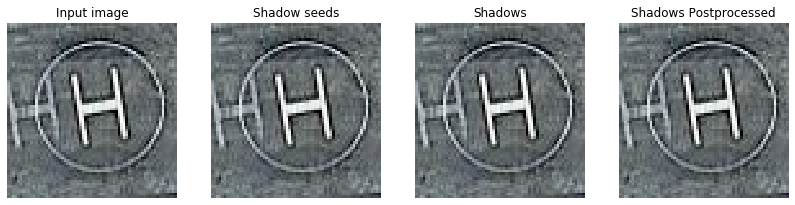

Satellite_19_438298_283703_0.jpg


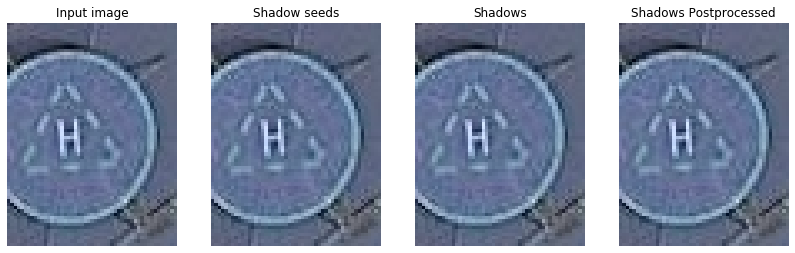

Satellite_19_438298_283873_0.jpg


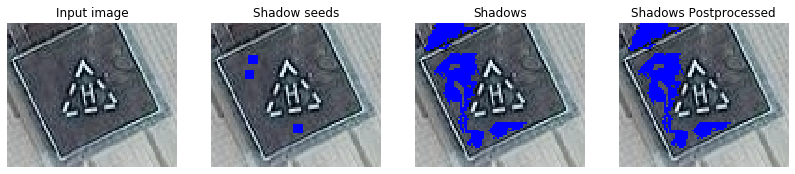

Satellite_19_438303_283271_0.jpg


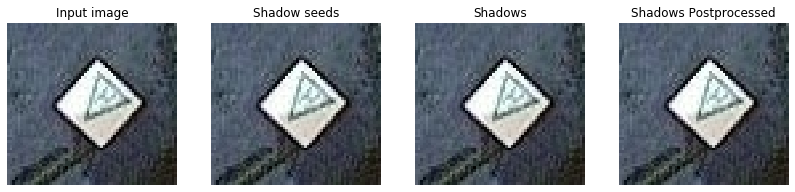

Satellite_19_438314_283613_0.jpg


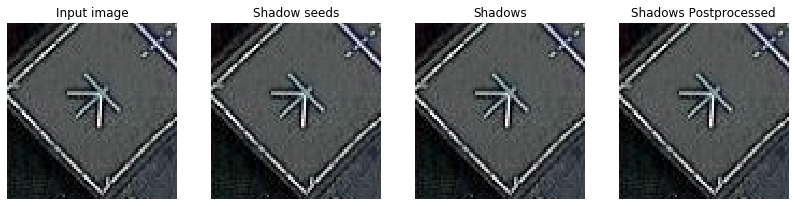

Satellite_19_438314_283806_0.jpg


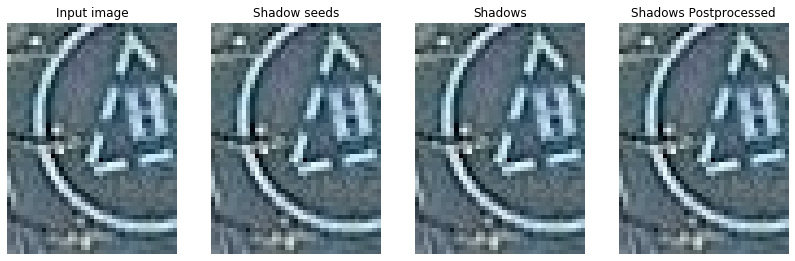

Satellite_19_438322_283728_0.jpg


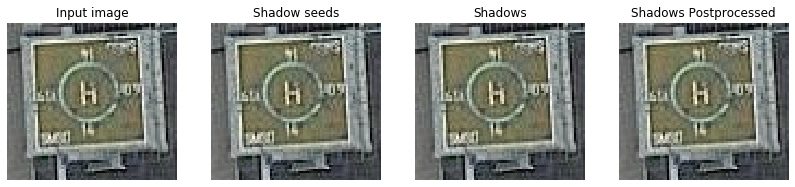

Satellite_19_438325_283610_0.jpg


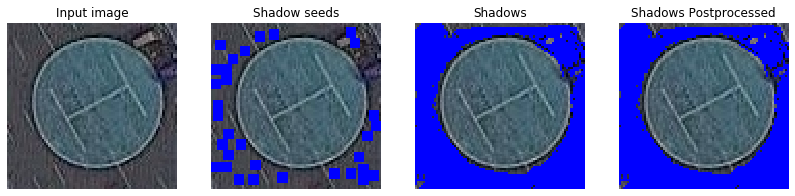

Satellite_19_438325_283611_0.jpg


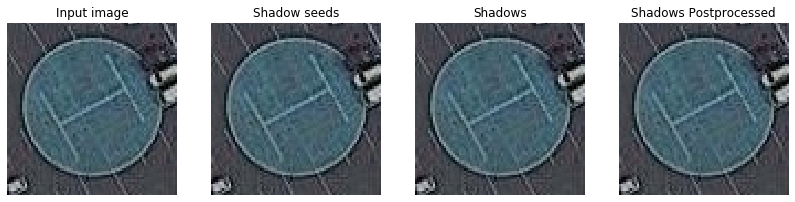

Satellite_19_438325_283636_0.jpg


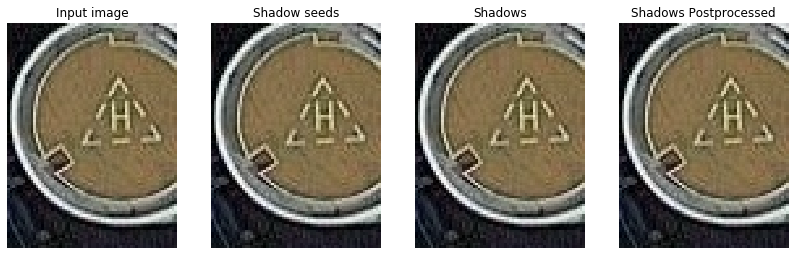

Satellite_19_438328_283316_0.jpg


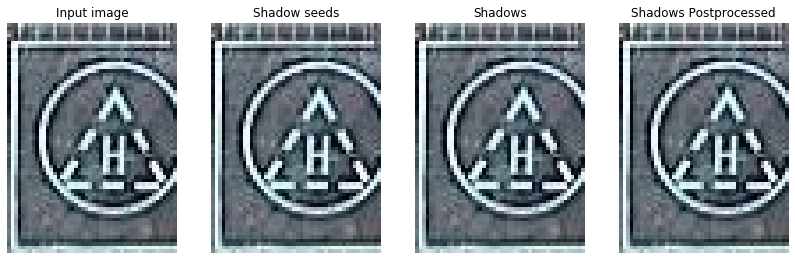

Satellite_19_438329_283728_0.jpg


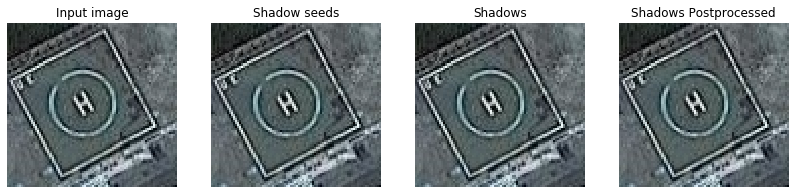

Satellite_19_438329_283770_0.jpg


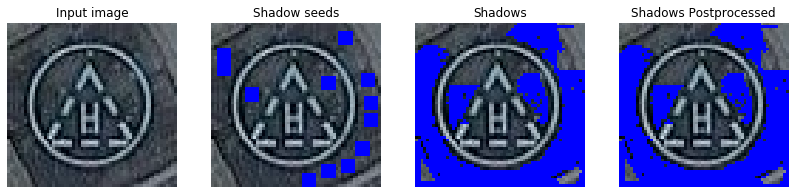

Satellite_19_438333_283605_0.jpg


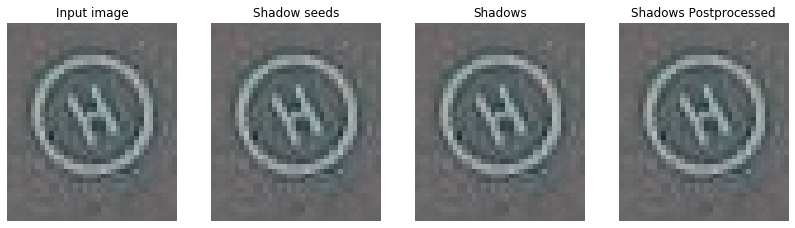

Satellite_19_438340_283599_0.jpg


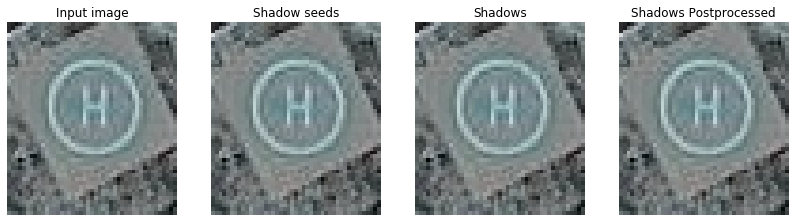

Satellite_19_438341_283601_0.jpg


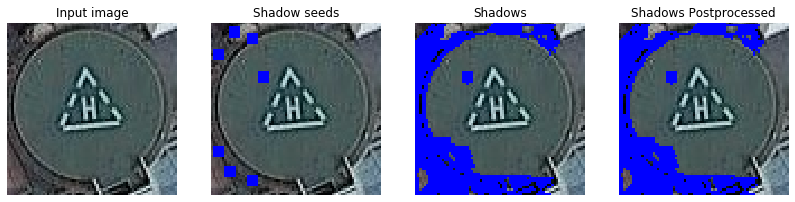

Satellite_19_438343_283669_0.jpg


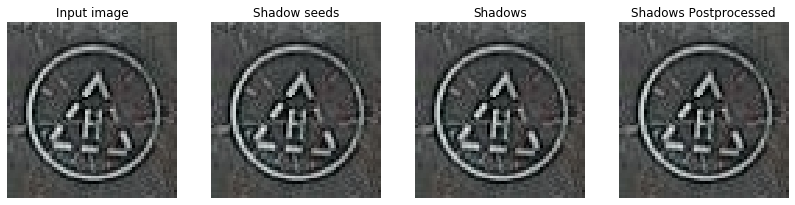

Satellite_19_438346_283679_0.jpg


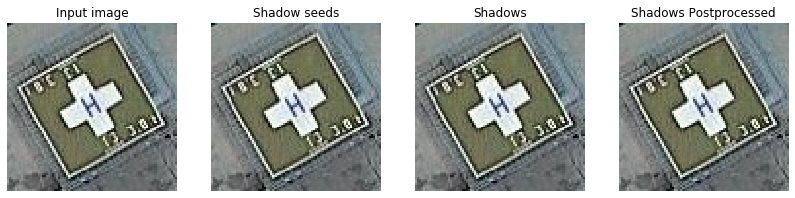

Satellite_19_438367_283860_0.jpg


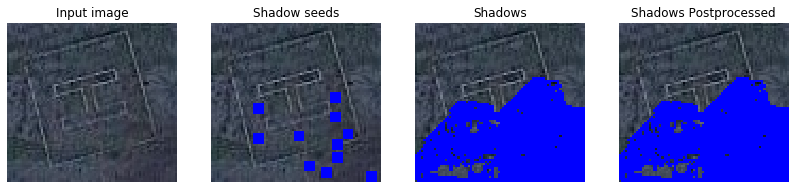

Satellite_19_438372_283507_0.jpg


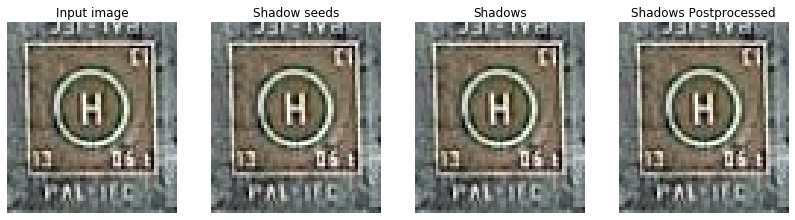

Satellite_19_438380_283387_0.jpg


KeyboardInterrupt: 

In [8]:
for subdir, dirs, files in os.walk(os.path.join(bounding_boxes_groundtruth_path, 'helipad'), topdown=True):
    for file in files:
        print(file)
        image_path = os.path.join(subdir, file)
        image = cv2.imread(image_path)
        shadow_detection = ShadowDetection(image,
                                           minimum_size_window=3,
                                           threshold_v=0.35,
                                           threshold_s=0.02,
                                           ratio=1,
                                           d_0=3)
        shadow_detection.run(verbose=3)

# Test of Method 3 on Detected False Positive in Manilla

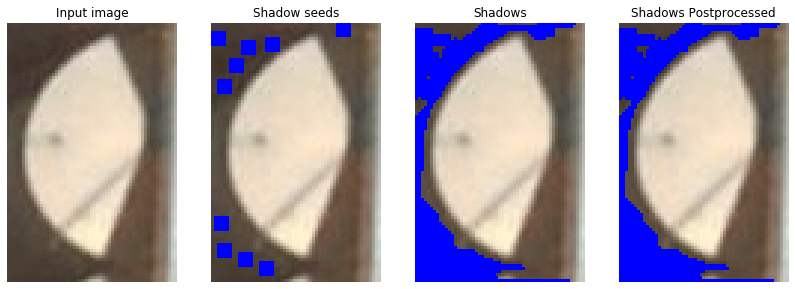

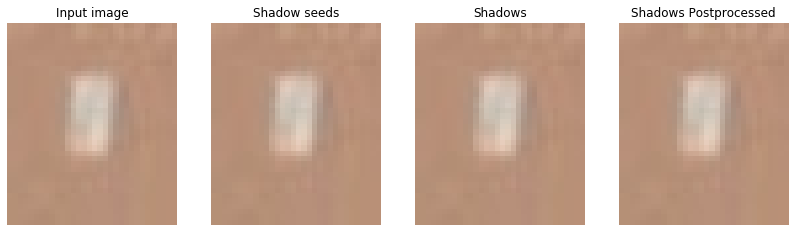

C:\Users\AISG\Documents\Jonas\helipad_detection\src\bb_analysis\shadow_detection.py:226: RuntimeWarning: invalid value encountered in double_scalars
  if np.abs(pixel_c3 - mean_c3)/sigma_c3 < d_0:


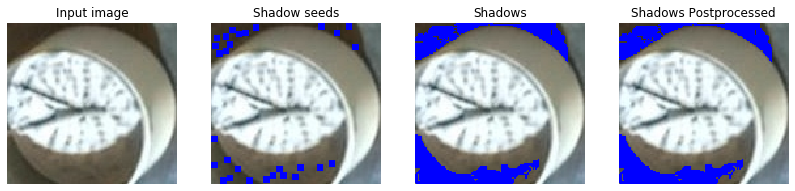

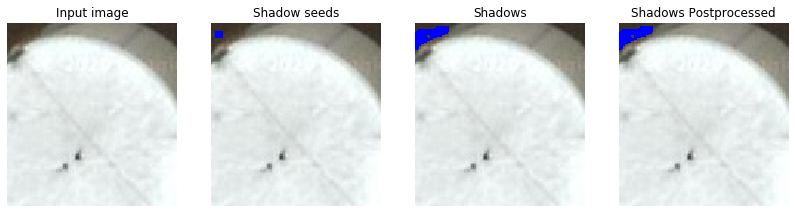

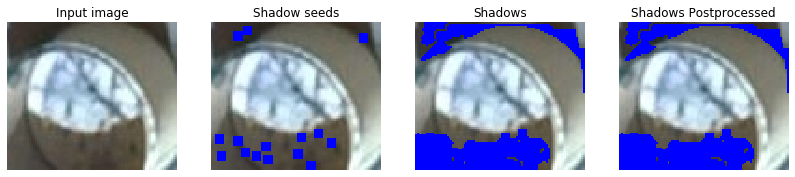

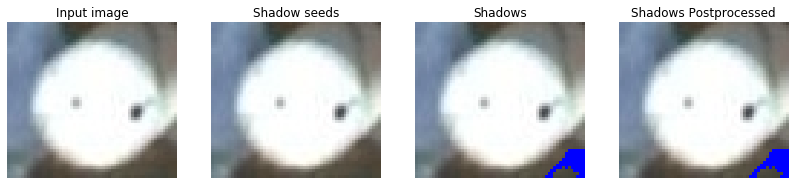

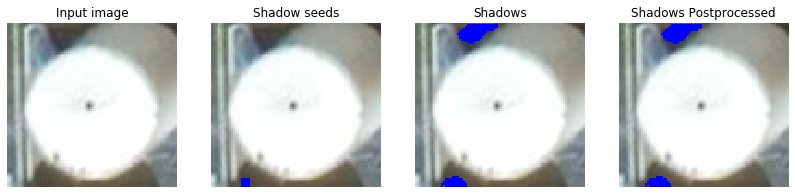

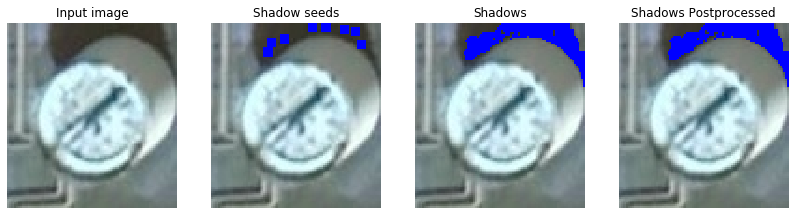

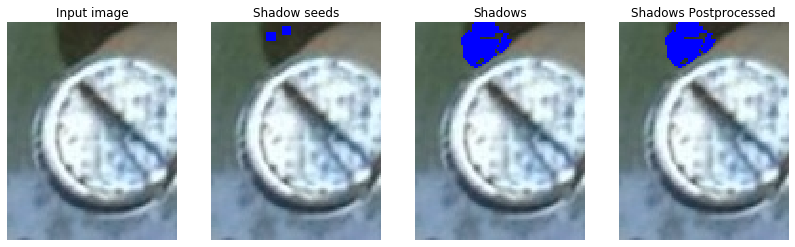

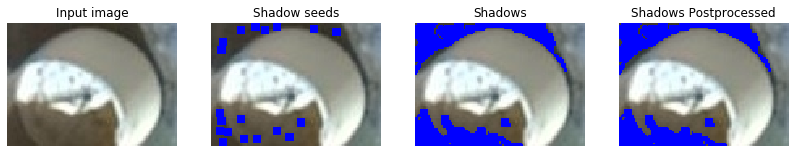

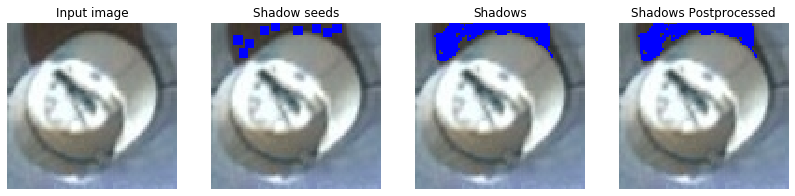

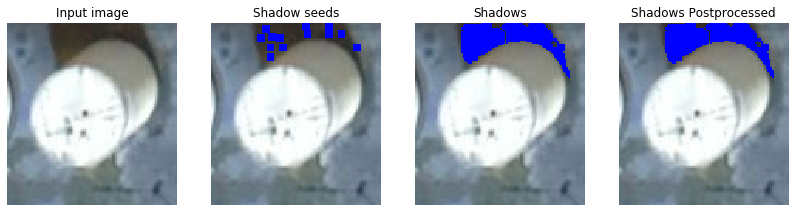

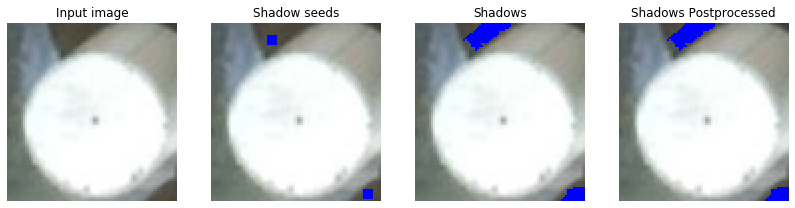

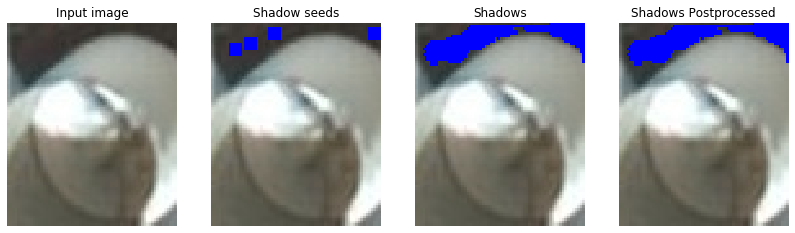

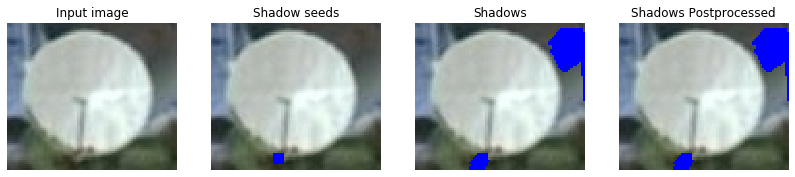

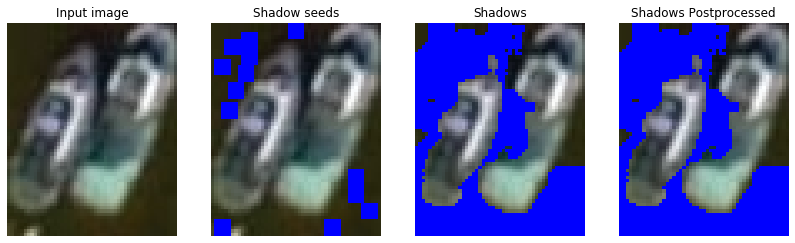

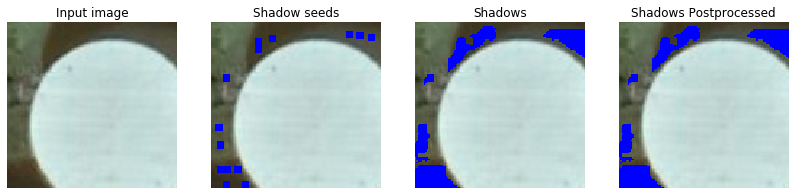

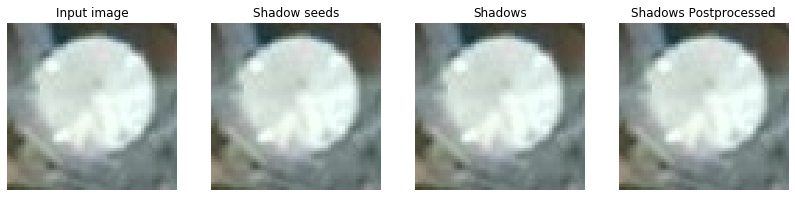

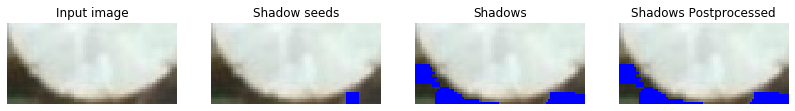

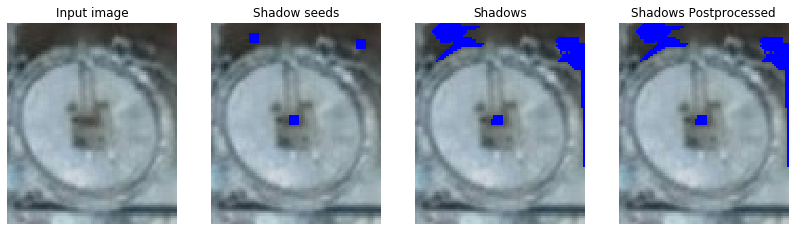

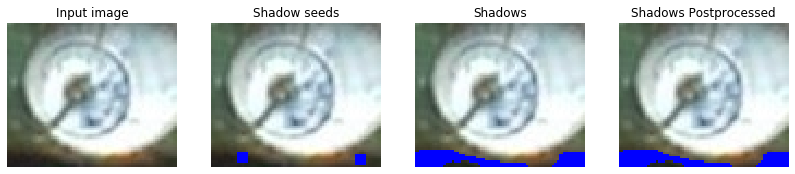

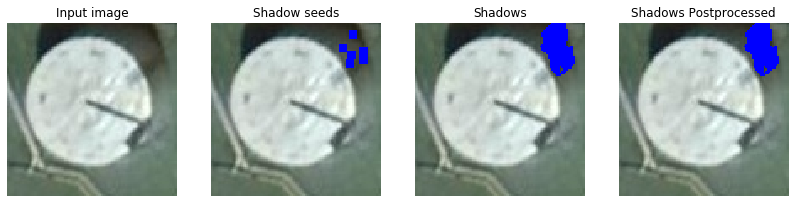

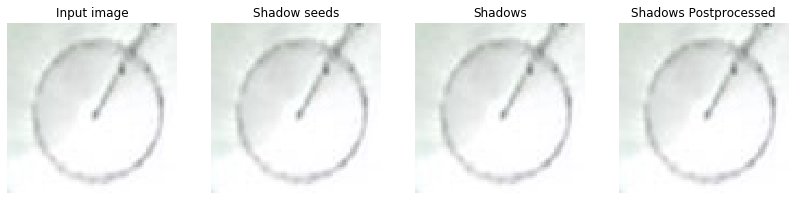

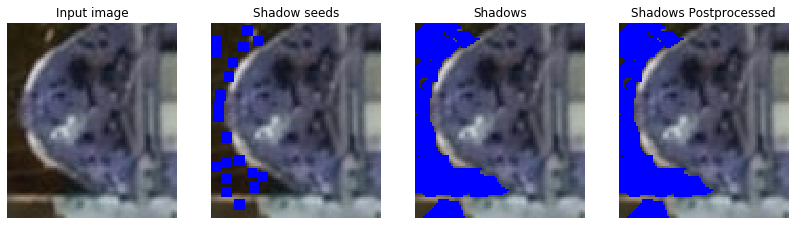

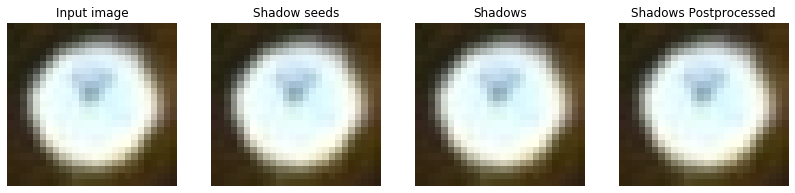

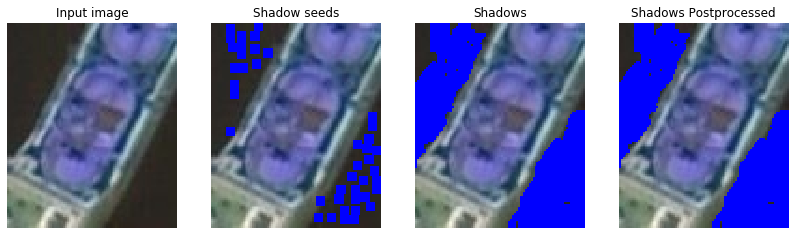

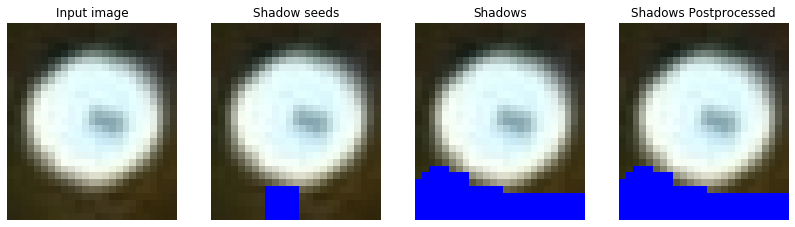

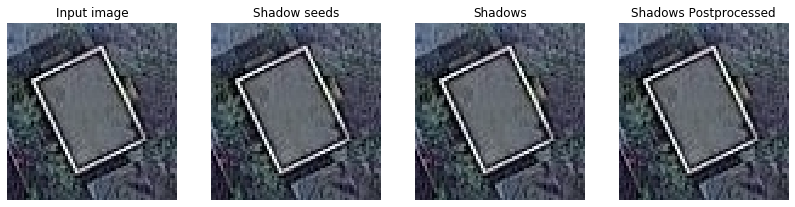

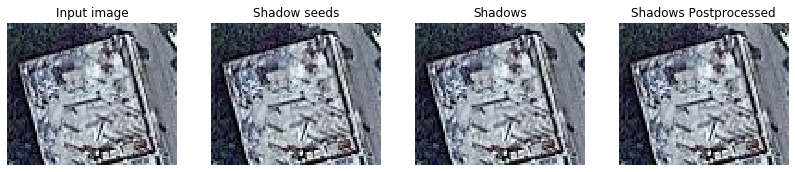

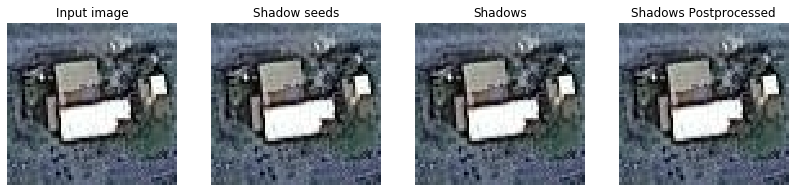

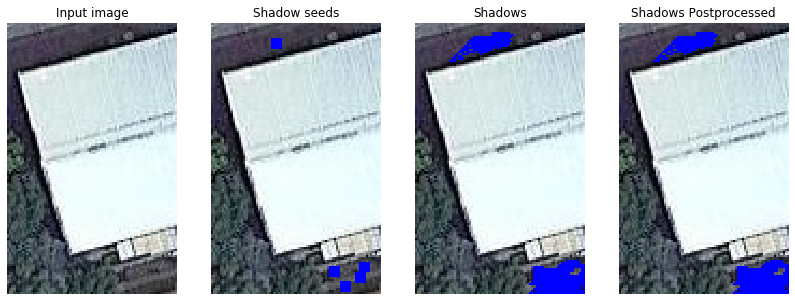

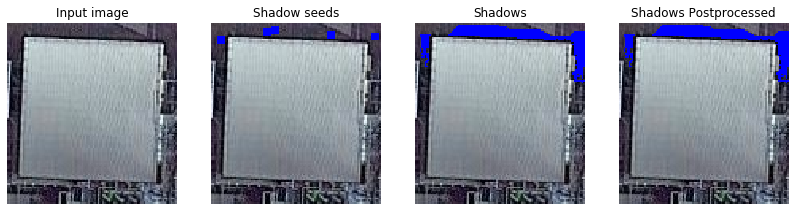

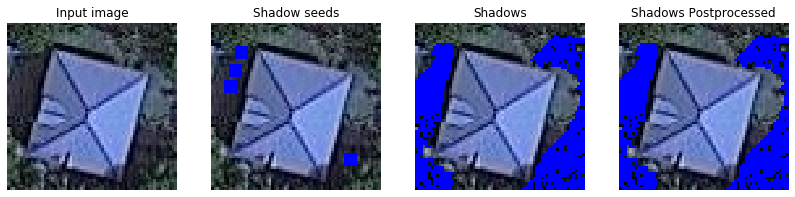

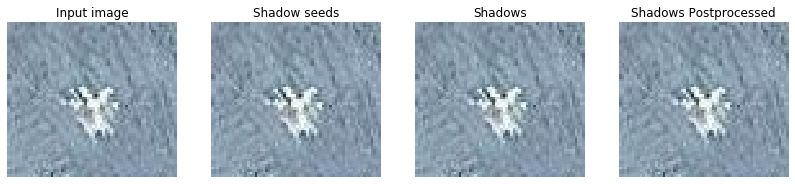

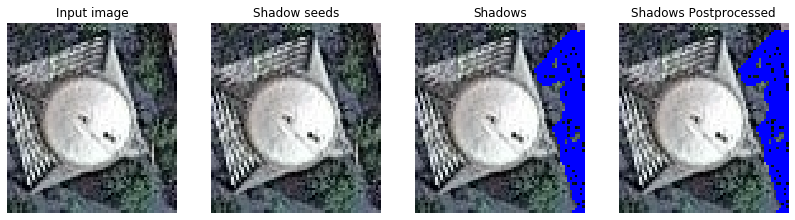

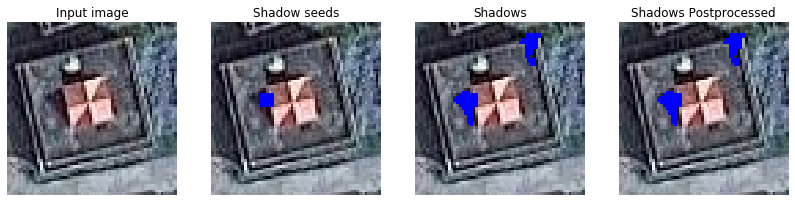

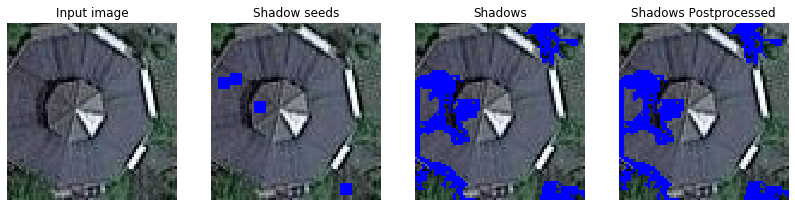

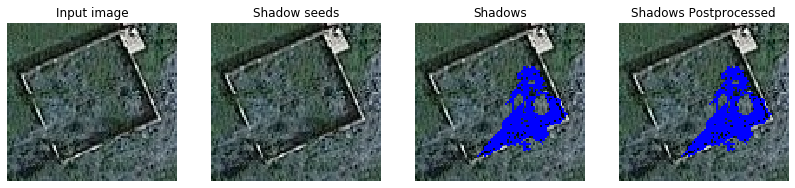

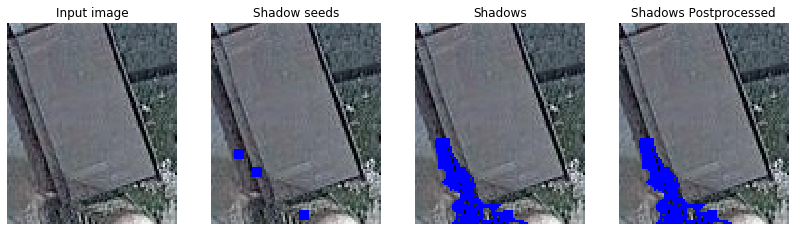

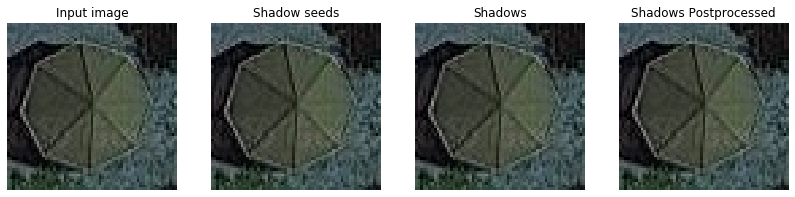

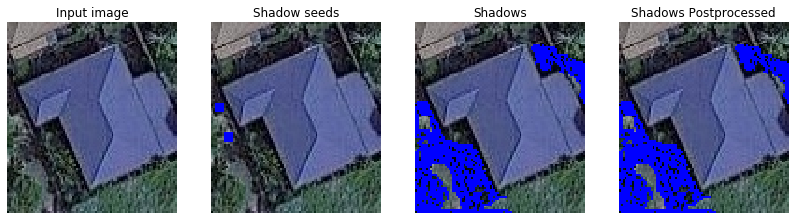

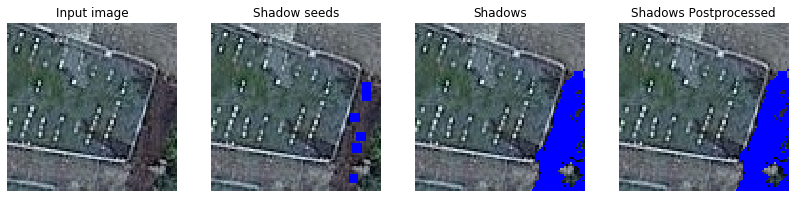

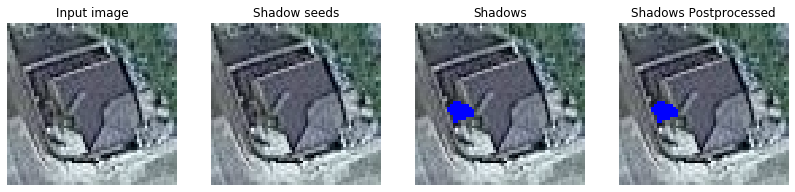

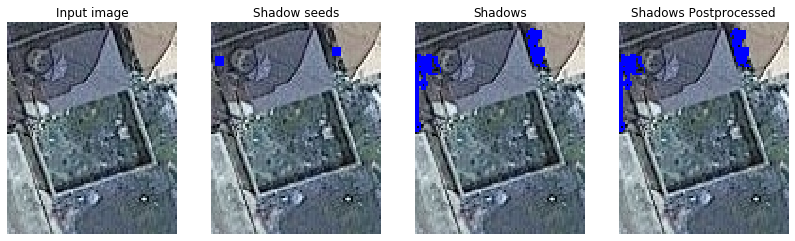

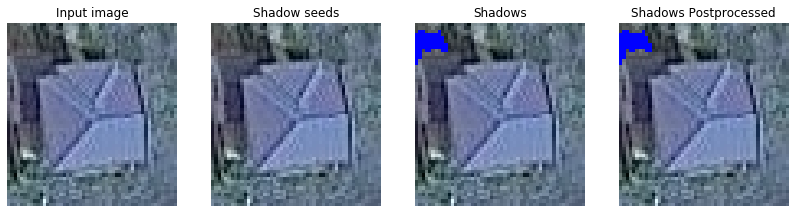

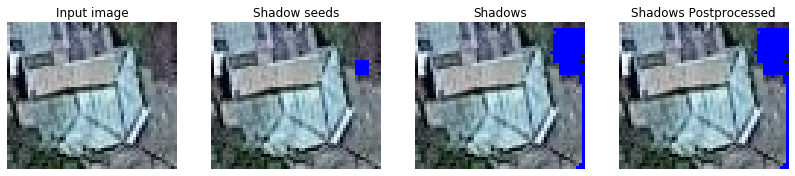

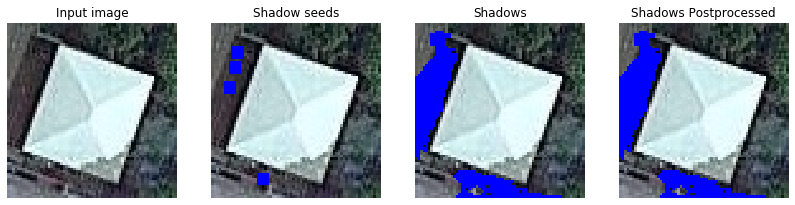

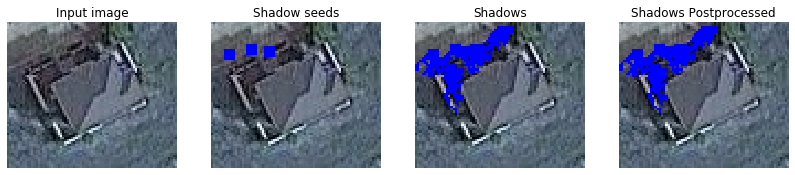

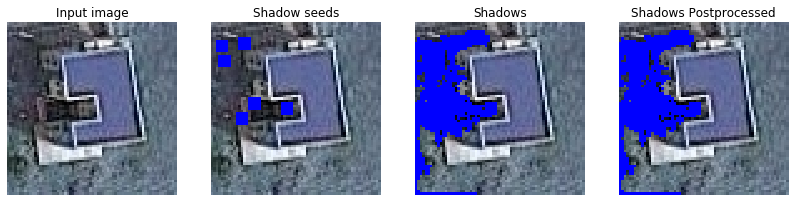

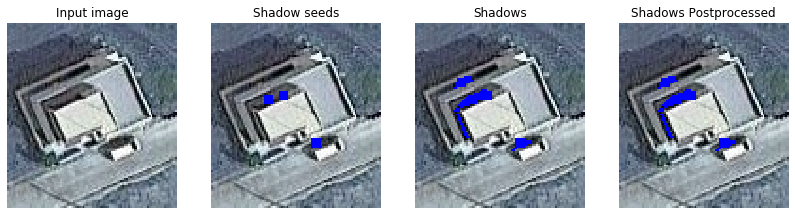

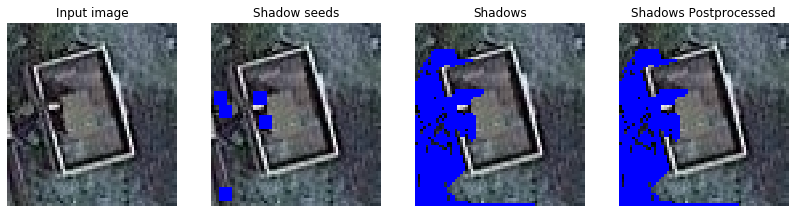

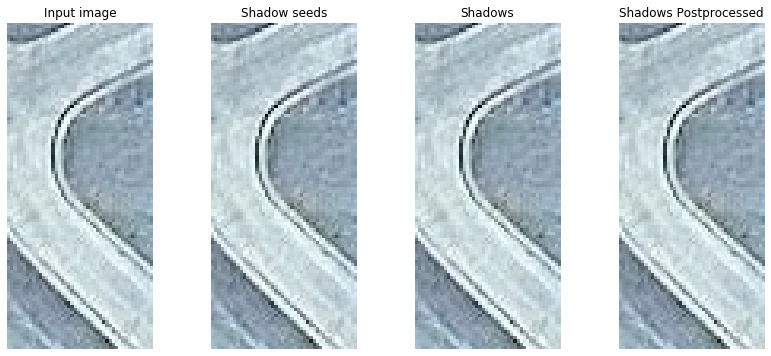

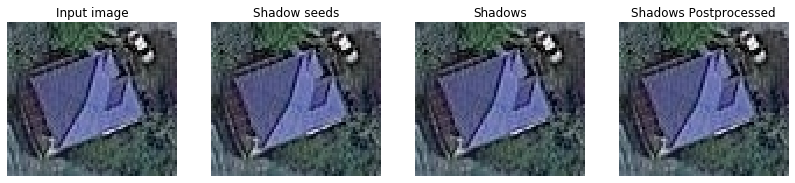

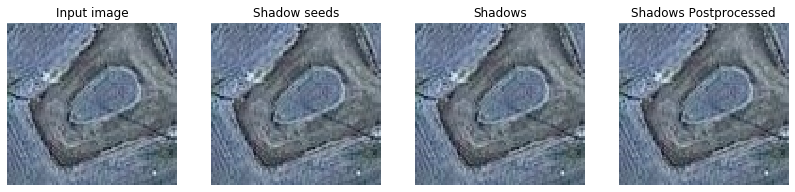

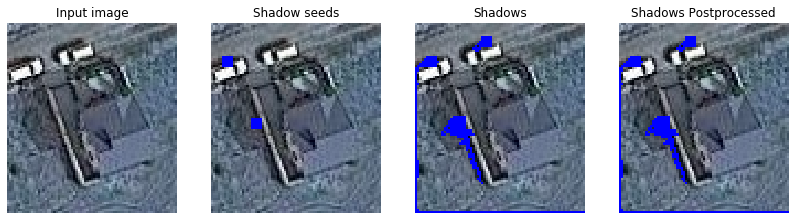

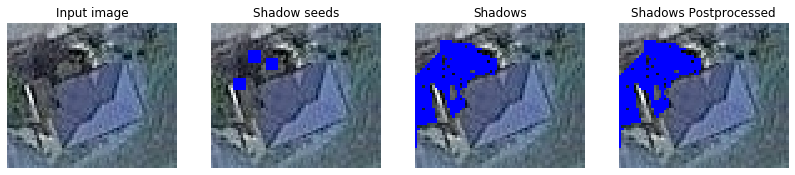

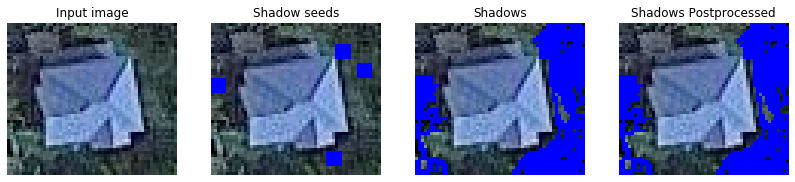

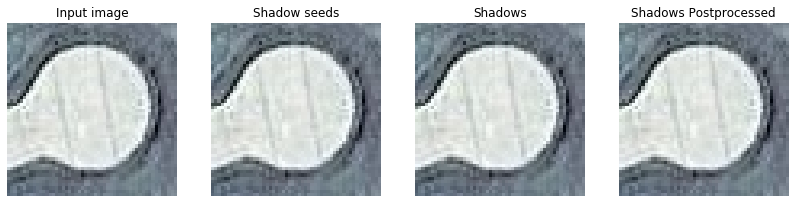

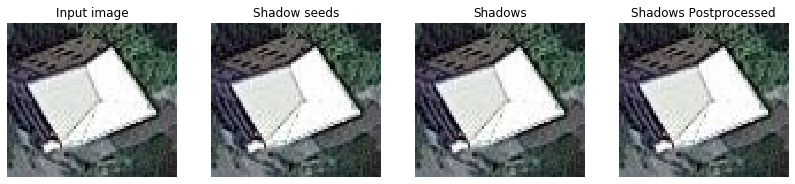

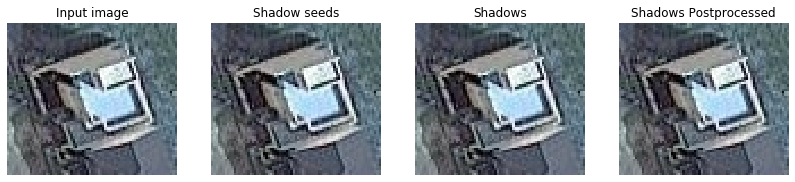

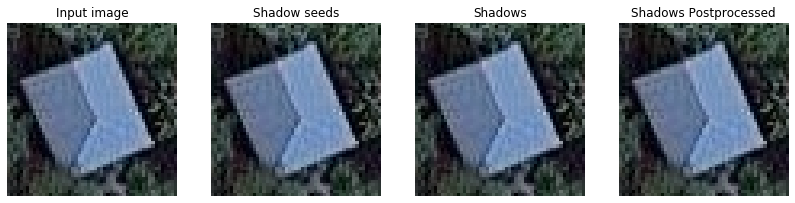

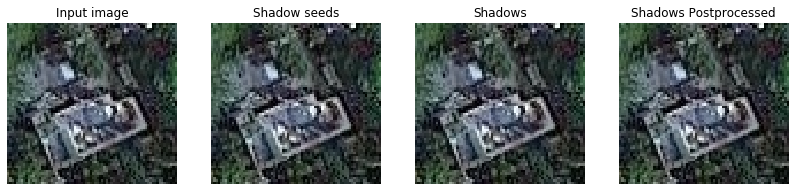

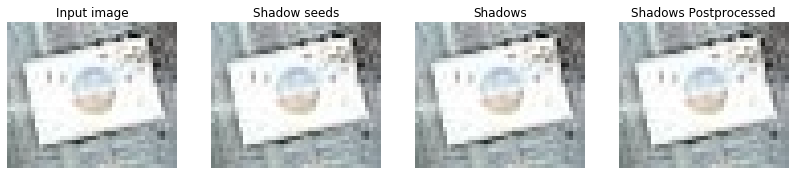

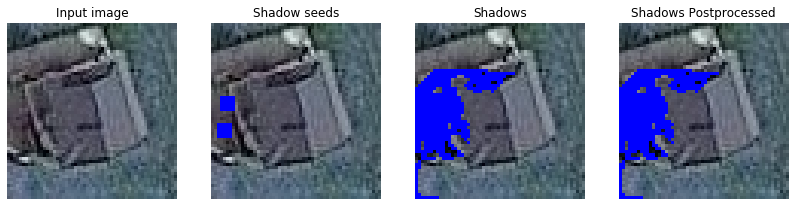

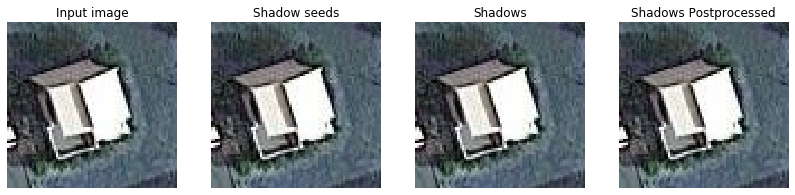

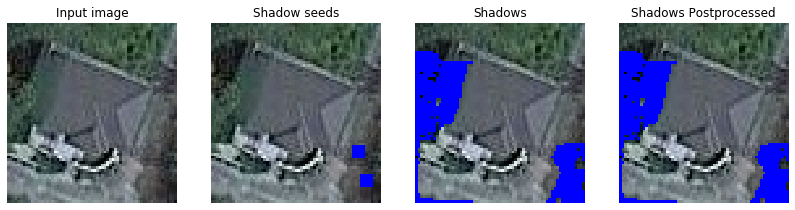

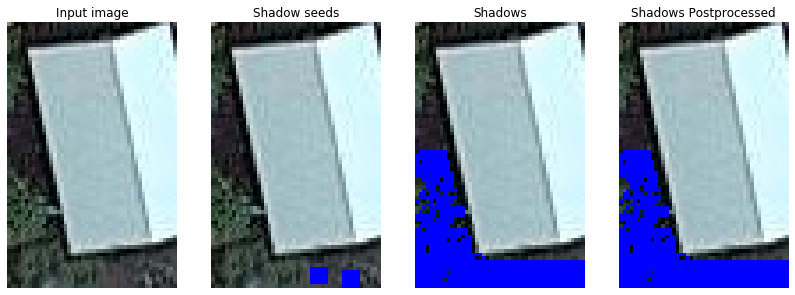

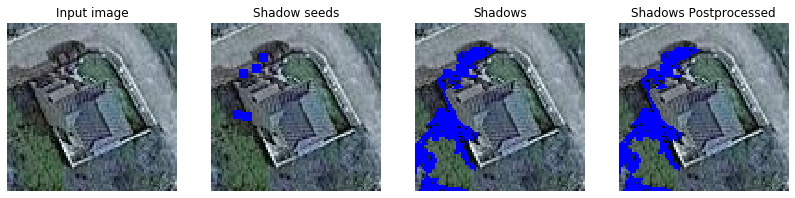

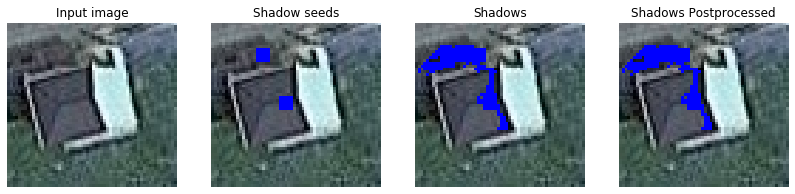

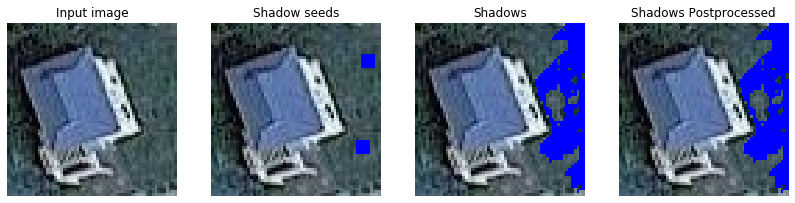

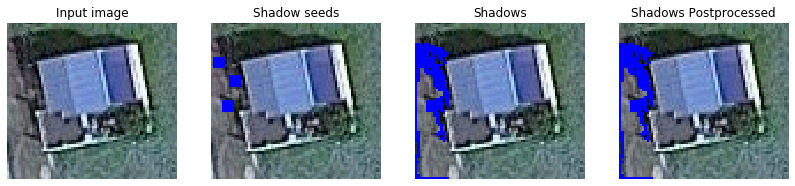

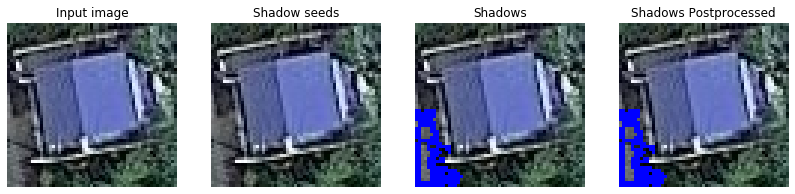

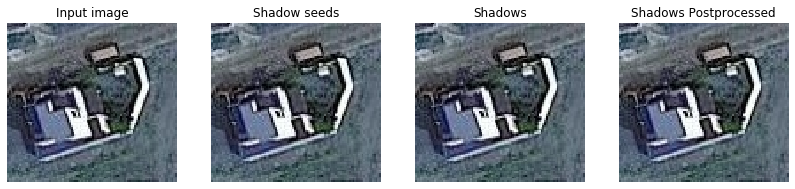

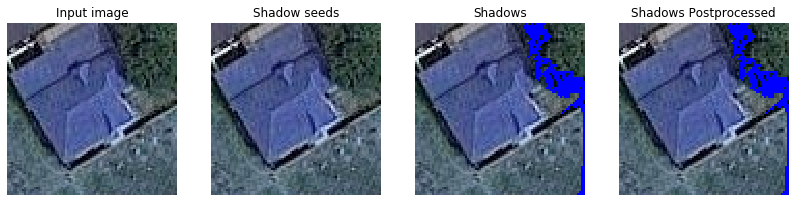

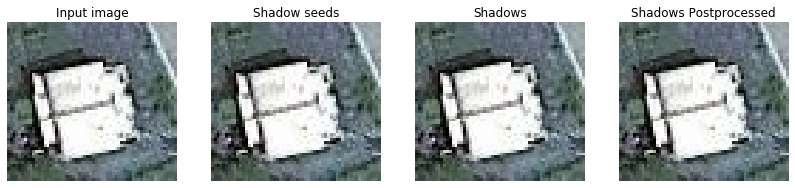

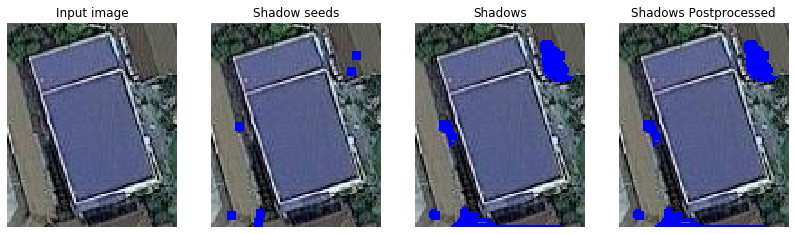

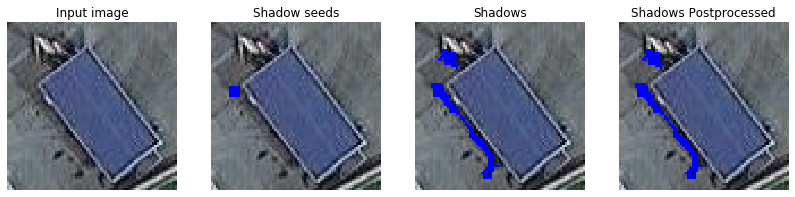

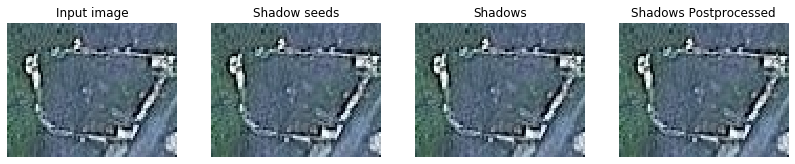

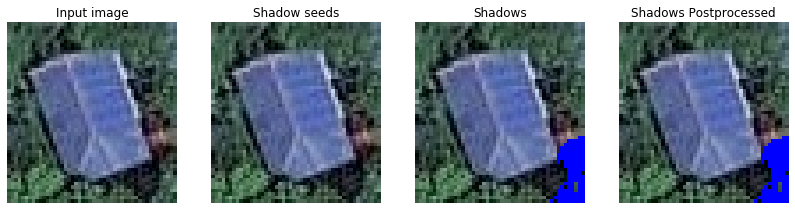

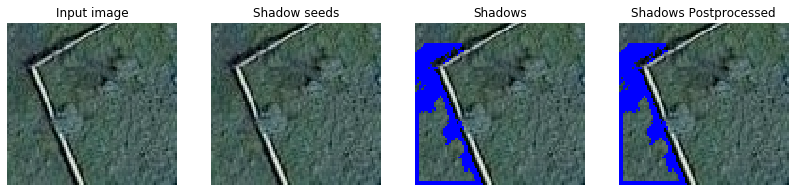

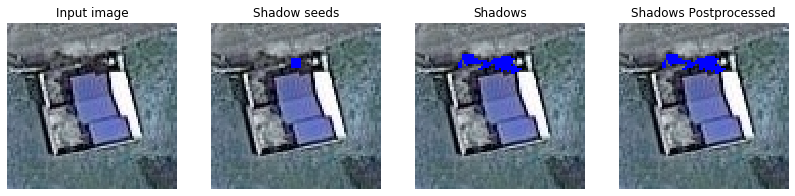

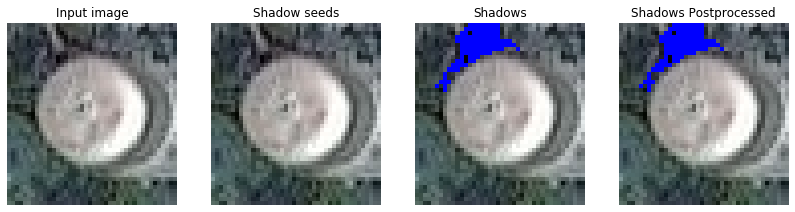

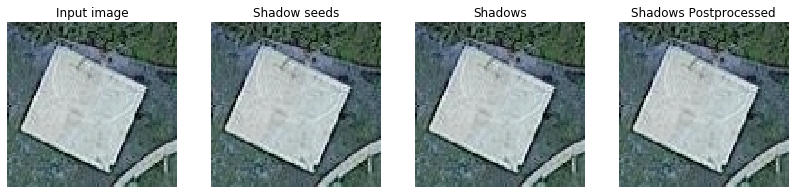

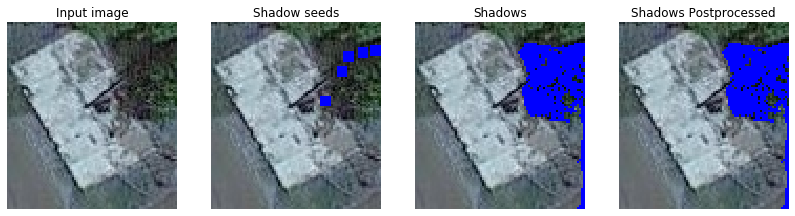

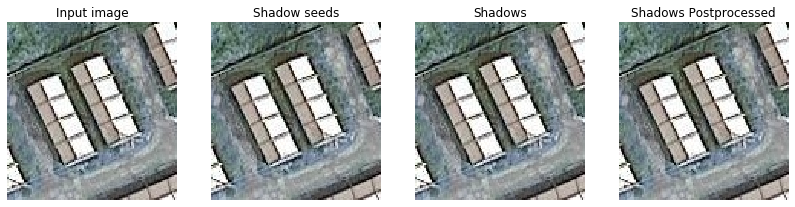

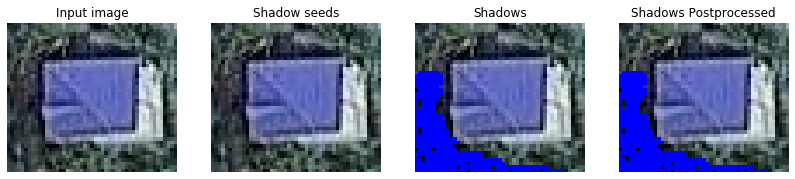

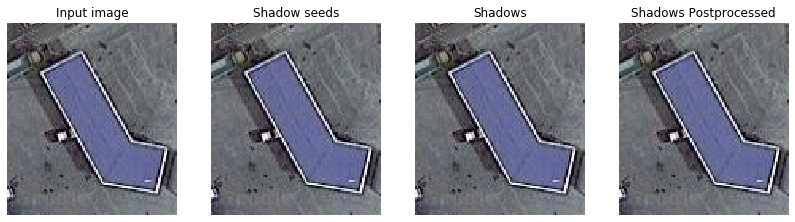

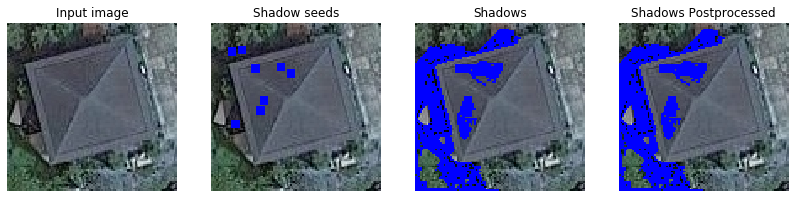

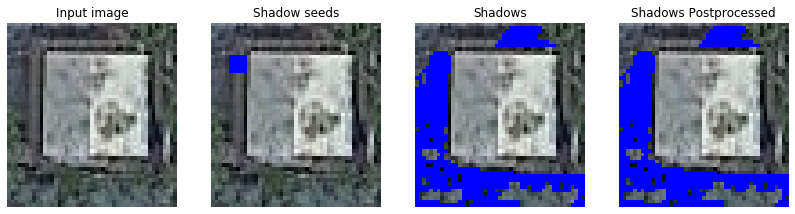

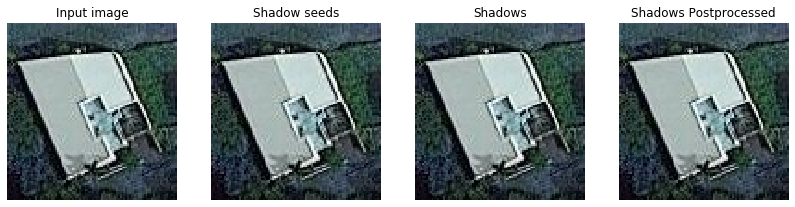

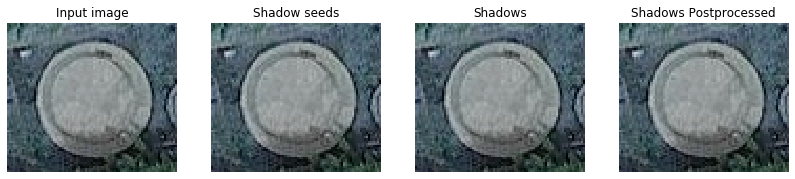

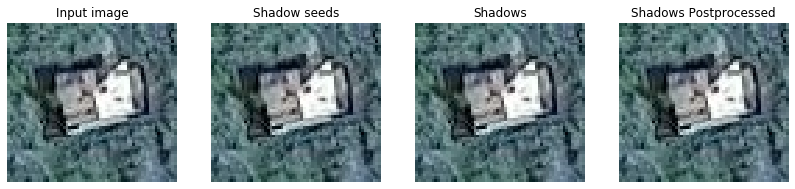

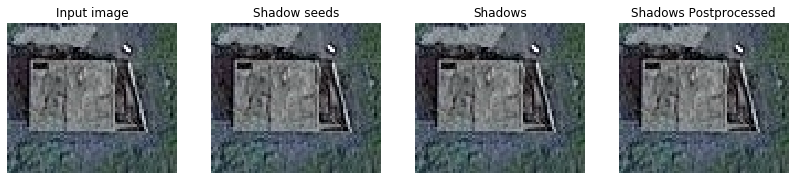

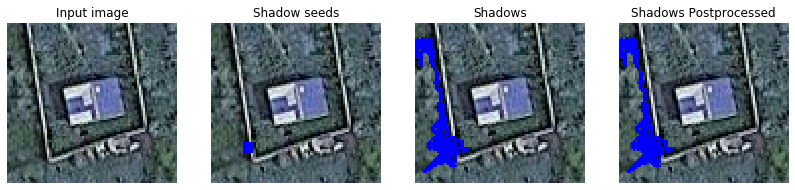

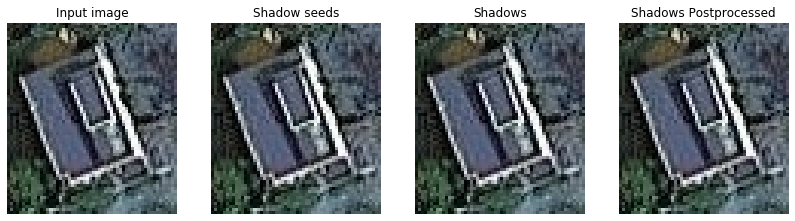

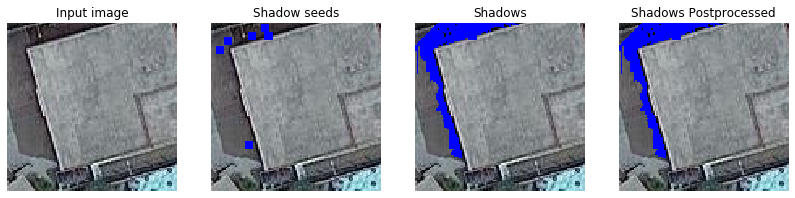

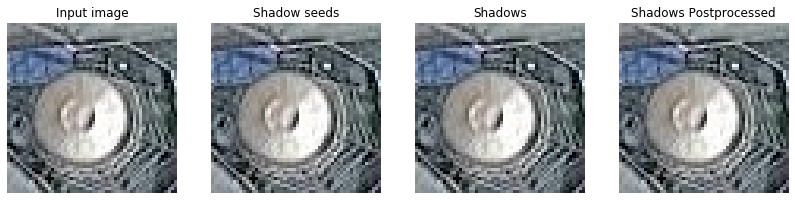

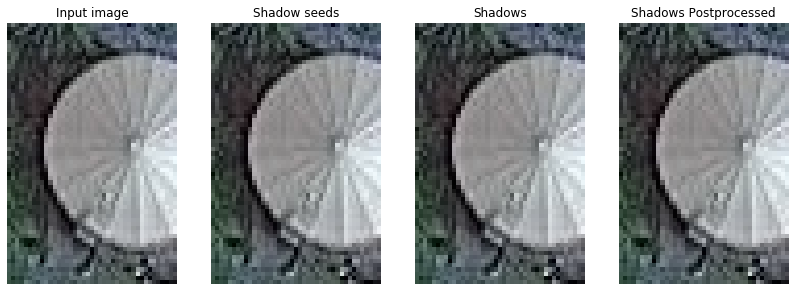

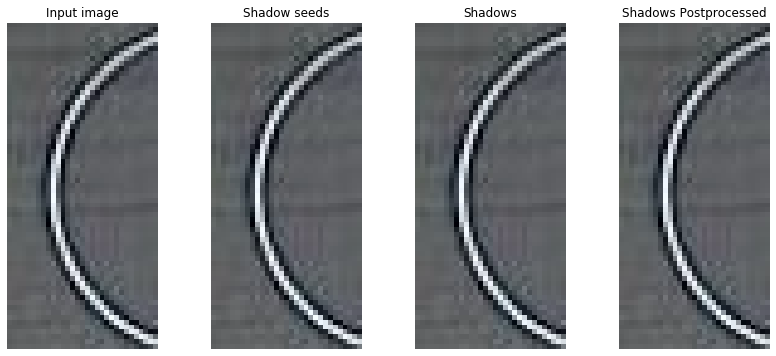

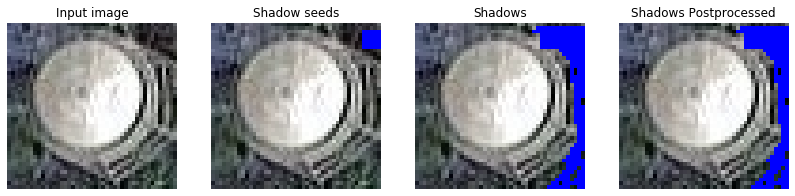

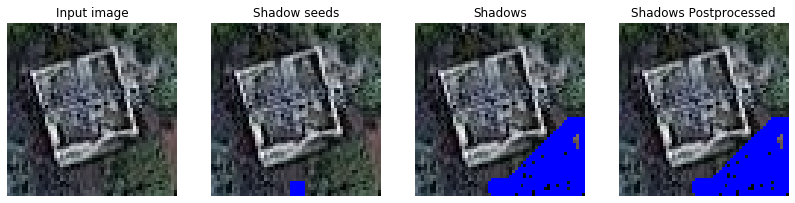

In [6]:
nb_files = 100
i = 0
for subdir, dirs, files in os.walk(os.path.join(bounding_boxes_groundtruth_path, 'false_positive'), topdown=True):
    for file in files:
        image_path = os.path.join(subdir, file)
        image = cv2.imread(image_path)
        shadow_detection = ShadowDetection(image,
                                           minimum_size_window=3,
                                           threshold_v=0.35,
                                           threshold_s=0.02,
                                           ratio=1,
                                           d_0=3)
        shadow_detection.run(verbose=3)
        if i==nb_files:
            break
        i+=1

# Benchmark of the Method

In [10]:
def benchmark_shadow_detection(bb_groundtruth_path):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    
    for subdir, dirs, files in os.walk(os.path.join(bb_groundtruth_path, 'helipad'), topdown=True):
        for file in files:
            image_path = os.path.join(subdir, file)
            image = cv2.imread(image_path)
            shadow_detection = ShadowDetection(image,
                                               minimum_size_window=3,
                                               threshold_v=0.35,
                                               threshold_s=0.02,
                                               ratio=1,
                                               d_0=3)
            res = shadow_detection.run(seed_only=True, verbose=0)
            if res:
                TP += 1
            else:
                FN += 1
    
    for subdir, dirs, files in os.walk(os.path.join(bb_groundtruth_path, 'false_positive'), topdown=True):
        for file in files:
            image_path = os.path.join(subdir, file)
            image = cv2.imread(image_path)
            shadow_detection = ShadowDetection(image,
                                               minimum_size_window=3,
                                               threshold_v=0.35,
                                               threshold_s=0.02,
                                               ratio=1,
                                               d_0=3)
            res = shadow_detection.run(seed_only=True, verbose=0)
            if res:
                FP += 1
            else:
                TN += 1
        
    return {'TP': TP, 
            'TN': TN,
            'FP': FP,
            'FN': FN}

In [11]:
bounding_boxes_groundtruth_path = "C:\\Users\\AISG\\Documents\\Jonas\\Helipad\\Real_World_Detected_Boxes\\model_10_0.0_groundtruth\\"
benchmark_results = benchmark_shadow_detection(bounding_boxes_groundtruth_path)
benchmark_results

C:\Users\AISG\Documents\Jonas\helipad_detection\src\bb_analysis\shadow_detection.py:37: RuntimeWarning: invalid value encountered in true_divide
  c3 = np.arctan(image[:,:,0]/np.maximum(image[:,:,1], image[:,:,2]))
C:\Users\AISG\Documents\Jonas\helipad_detection\src\bb_analysis\shadow_detection.py:37: RuntimeWarning: divide by zero encountered in true_divide
  c3 = np.arctan(image[:,:,0]/np.maximum(image[:,:,1], image[:,:,2]))


{'TP': 46, 'TN': 231, 'FP': 269, 'FN': 20}

In [18]:
bounding_boxes_groundtruth_path = "C:\\Users\\AISG\\Documents\\Jonas\\Helipad\\Real_World_Detected_Boxes\\model_10_0.0_zoomout5_groundtruth\\"
benchmark_results = benchmark_shadow_detection(bounding_boxes_groundtruth_path)
benchmark_results

{'TP': 47, 'TN': 246, 'FP': 253, 'FN': 19}

In [13]:
bounding_boxes_groundtruth_path = "C:\\Users\\AISG\\Documents\\Jonas\\Helipad\\Real_World_Detected_Boxes\\model_10_0.0_zoomout10_groundtruth\\"
benchmark_results = benchmark_shadow_detection(bounding_boxes_groundtruth_path)
benchmark_results

{'TP': 40, 'TN': 241, 'FP': 258, 'FN': 26}

In [14]:
bounding_boxes_groundtruth_path = "C:\\Users\\AISG\\Documents\\Jonas\\Helipad\\Real_World_Detected_Boxes\\model_10_0.0_zoomout7_groundtruth\\"
benchmark_results = benchmark_shadow_detection(bounding_boxes_groundtruth_path)
benchmark_results

{'TP': 40, 'TN': 239, 'FP': 260, 'FN': 26}

In [15]:
bounding_boxes_groundtruth_path = "C:\\Users\\AISG\\Documents\\Jonas\\Helipad\\Real_World_Detected_Boxes\\model_10_0.0_zoomout6_groundtruth\\"
benchmark_results = benchmark_shadow_detection(bounding_boxes_groundtruth_path)
benchmark_results

{'TP': 43, 'TN': 242, 'FP': 257, 'FN': 23}

In [16]:
bounding_boxes_groundtruth_path = "C:\\Users\\AISG\\Documents\\Jonas\\Helipad\\Real_World_Detected_Boxes\\model_10_0.0_zoomout4_groundtruth\\"
benchmark_results = benchmark_shadow_detection(bounding_boxes_groundtruth_path)
benchmark_results

{'TP': 42, 'TN': 248, 'FP': 251, 'FN': 24}

In [17]:
bounding_boxes_groundtruth_path = "C:\\Users\\AISG\\Documents\\Jonas\\Helipad\\Real_World_Detected_Boxes\\model_10_0.0_zoomout3_groundtruth\\"
benchmark_results = benchmark_shadow_detection(bounding_boxes_groundtruth_path)
benchmark_results

{'TP': 44, 'TN': 238, 'FP': 261, 'FN': 22}

In [19]:
def filter_by_area(bb_image_path, meta_folder, model_number, lower=200, higher=600, score_threshold=0.96727442):
    bb_image_name = os.path.splitext(os.path.basename(bb_image_path))[0]
    image_info = bb_image_name.split('_')
    zoom = image_info[1]
    xtile = image_info[2]
    ytile = image_info[3]
    
    meta_path = os.path.join(meta_folder, zoom, xtile, f"Satellite_{zoom}_{xtile}_{ytile}.meta")
    
    if not os.path.isfile(meta_path):
        print("Meta File does not exist")
        return -1
    
    with open(meta_path, 'r') as j:
        meta = json.load(j)
    j.close()
    bounds = meta["predicted"]["model_{}".format(model_number)]["coordinates"]["bounds"]
    l = compute_distance_between_two_gps_points(bounds[0][0], bounds[0][1])
    L = compute_distance_between_two_gps_points(bounds[0][0], bounds[0][2])
    area = l*L

    if area<lower or area>higher:
        return 0
    else:
        scores = meta["predicted"]["model_{}".format(model_number)]["score"]
        for score in scores:
            if score>=score_threshold:
                return 1
        return 0

def compute_distance_between_two_gps_points(point_1, point_2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(point_1[0])
    lon1 = radians(point_1[1])
    lat2 = radians(point_2[0])
    lon2 = radians(point_2[1])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c * 1000
    
    return distance

def find_groundtruth_from_name(meta_filename, bb_groundtruth_path):
    helipad_filenames = os.listdir(os.path.join(bb_groundtruth_path, 'helipad'))
    fp_filenames = os.listdir(os.path.join(bb_groundtruth_path, 'false_positive'))
    meta_info = meta_filename.split('.')[0]
    for filename in helipad_filenames:
        image_name = "_".join(filename.split('_')[:4])
        if image_name == meta_info:
            return 'helipad'
    
    for filename in fp_filenames:
        image_name = "_".join(filename.split('_')[:4])
        if image_name == meta_info:
            return 'false_positive'

In [22]:
def benchmark_shadow_detection_filter_area(bb_groundtruth_path, meta_path, model_number=10, lower=200, higher=600, score_threshold=0.96727442):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    
    for subdir, dirs, files in os.walk(os.path.join(bb_groundtruth_path, 'helipad'), topdown=True):
        for file in files:
            image_path = os.path.join(subdir, file)
            image = cv2.imread(image_path)
            shadow_detection = ShadowDetection(image,
                                               minimum_size_window=3,
                                               threshold_v=0.35,
                                               threshold_s=0.02,
                                               ratio=1,
                                               d_0=3)
            res_s = shadow_detection.run(seed_only=True, verbose=0)
            if res_s:
                res_a = filter_by_area(image_path, meta_folder, model_number, lower=lower, higher=higher, score_threshold=score_threshold)
                if res_a == 1:
                    TP += 1
                elif res_a == 0:
                    FN += 1
            else:
                FN += 1
    
    for subdir, dirs, files in os.walk(os.path.join(bb_groundtruth_path, 'false_positive'), topdown=True):
        for file in files:
            image_path = os.path.join(subdir, file)
            image = cv2.imread(image_path)
            shadow_detection = ShadowDetection(image,
                                               minimum_size_window=3,
                                               threshold_v=0.35,
                                               threshold_s=0.02,
                                               ratio=1,
                                               d_0=3)
            res = shadow_detection.run(seed_only=True, verbose=0)
            if res:
                res_a = filter_by_area(image_path, meta_folder, model_number, lower=lower, higher=higher, score_threshold=score_threshold)
                if res_a == 1:
                    FP += 1
                elif res_a == 0:
                    TN += 1
            else:
                TN += 1
        
    return {'TP': TP, 
            'TN': TN,
            'FP': FP,
            'FN': FN}

In [31]:
def benchmark_shadow_detection_filter_area_zoomout(bb_base_folder, meta_path, model_number=10, zoom_out=None, lower=200, higher=600, score_threshold=0.96727442):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    
    bb_groundtruth_folder = os.path.join(bb_base_folder, "model_{}_0.0_groundtruth".format(model_number))
    if zoom_out:
        bb_zoomout_groundtruth_folder = os.path.join(bb_base_folder, "model_{}_0.0_zoomout{}_groundtruth".format(model_number,
                                                                                                                 zoom_out))
    
    for subdir, dirs, files in os.walk(os.path.join(bb_groundtruth_folder, 'helipad'), topdown=True):
        for file in files:
            image_path = os.path.join(subdir, file)
            if zoom_out:
                image_zoomout_path = os.path.join(bb_zoomout_groundtruth_folder, 'helipad', os.path.basename(file))
                image = cv2.imread(image_zoomout_path)
            else:
                image = cv2.imread(image_path)
            # apply shadow detection on the zoom out image
            shadow_detection = ShadowDetection(image,
                                               minimum_size_window=3,
                                               threshold_v=0.35,
                                               threshold_s=0.02,
                                               ratio=1,
                                               d_0=3)
            res_s = shadow_detection.run(seed_only=True, verbose=0)
            if res_s:
                # apply filter by area and then by score on the original bounding box
                res_a = filter_by_area(image_path, meta_folder, model_number, lower=lower, higher=higher, score_threshold=score_threshold)
                if res_a == 1:
                    TP += 1
                elif res_a == 0:
                    FN += 1
            else:
                FN += 1
    
    for subdir, dirs, files in os.walk(os.path.join(bb_groundtruth_folder, 'false_positive'), topdown=True):
        for file in files:
            image_path = os.path.join(subdir, file)
            if zoom_out:
                image_zoomout_path = os.path.join(bb_zoomout_groundtruth_folder, 'false_positive', os.path.basename(file))
                image = cv2.imread(image_zoomout_path)
            else:
                image = cv2.imread(image_path)
            if image is None:
                print(image_path)
                print(image_zoomout_path)
                continue
            # apply shadow detection on the zoom out image
            shadow_detection = ShadowDetection(image,
                                               minimum_size_window=3,
                                               threshold_v=0.35,
                                               threshold_s=0.02,
                                               ratio=1,
                                               d_0=3)
            res = shadow_detection.run(seed_only=True, verbose=0)
            if res:
                # apply filter by area and then by score on the original bounding box
                res_a = filter_by_area(image_path, meta_folder, model_number, lower=lower, higher=higher, score_threshold=score_threshold)
                if res_a == 1:
                    FP += 1
                elif res_a == 0:
                    TN += 1
            else:
                TN += 1
        
    res = {'TP': TP, 
           'TN': TN,
           'FP': FP,
           'FN': FN}
    
    accuracy = (res['TP']+res['TN'])/(res['TP']+res['TN']+res['FP']+res['FN'])
    error = (res['FP']+res['FN'])/(res['TP']+res['TN']+res['FP']+res['FN'])
    precision = res['TP']/(res['TP']+res['FP'])
    recall = res['FP']/(res['TN']+res['FP'])
    res['accuracy'] = accuracy
    res['error'] = error
    res['precision'] = precision
    res['recall'] = recall
    
    return res

In [27]:
from math import radians, sin, atan, cos, atan2, sqrt

In [35]:
bounding_boxes_groundtruth_path = "C:\\Users\\AISG\\Documents\\Jonas\\Helipad\\Real_World_Detected_Boxes\\model_10_0.0_groundtruth\\"
benchmark_results = benchmark_shadow_detection(bounding_boxes_groundtruth_path)
benchmark_results

{'TP': 46, 'TN': 231, 'FP': 269, 'FN': 20}

In [34]:
bounding_boxes_groundtruth_path = "C:\\Users\\AISG\\Documents\\Jonas\\Helipad\\Real_World_Detected_Boxes\\model_10_0.0_zoomout5_groundtruth\\"
benchmark_results = benchmark_shadow_detection(bounding_boxes_groundtruth_path)
benchmark_results

{'TP': 47, 'TN': 246, 'FP': 253, 'FN': 19}

In [36]:
bb_base_folder = "C:\\Users\\AISG\\Documents\\Jonas\\Helipad\\Real_World_Detected_Boxes\\"
meta_folder = "C:\\Users\\AISG\\Documents\\Jonas\\Real_World_Dataset_TMS_meta\\sat\\"
model_number = 10 
zoom_out = 5
lower = 200
higher = 600
score_threshold = 0

res = benchmark_shadow_detection_filter_area_zoomout(bb_base_folder=bb_base_folder,
                                                     meta_path=meta_folder,
                                                     model_number=model_number,
                                                     zoom_out=zoom_out,
                                                     lower=lower,
                                                     higher=higher,
                                                     score_threshold=score_threshold)

res

C:\Users\AISG\Documents\Jonas\Helipad\Real_World_Detected_Boxes\model_10_0.0_groundtruth\false_positive\Satellite_19_438501_283780_0.jpg
C:\Users\AISG\Documents\Jonas\Helipad\Real_World_Detected_Boxes\model_10_0.0_zoomout5_groundtruth\false_positive\Satellite_19_438501_283780_0.jpg


{'TP': 41, 'TN': 352, 'FP': 147, 'FN': 25}

In [38]:
bb_base_folder = "C:\\Users\\AISG\\Documents\\Jonas\\Helipad\\Real_World_Detected_Boxes\\"
meta_folder = "C:\\Users\\AISG\\Documents\\Jonas\\Real_World_Dataset_TMS_meta\\sat\\"
model_number = 10 
zoom_out = 5
lower = 177
higher = 586
score_threshold = 0

res = benchmark_shadow_detection_filter_area_zoomout(bb_base_folder=bb_base_folder,
                                                     meta_path=meta_folder,
                                                     model_number=model_number,
                                                     zoom_out=zoom_out,
                                                     lower=lower,
                                                     higher=higher,
                                                     score_threshold=score_threshold)

res

C:\Users\AISG\Documents\Jonas\Helipad\Real_World_Detected_Boxes\model_10_0.0_groundtruth\false_positive\Satellite_19_438501_283780_0.jpg
C:\Users\AISG\Documents\Jonas\Helipad\Real_World_Detected_Boxes\model_10_0.0_zoomout5_groundtruth\false_positive\Satellite_19_438501_283780_0.jpg


{'TP': 41, 'TN': 356, 'FP': 143, 'FN': 25}

In [39]:
bb_base_folder = "C:\\Users\\AISG\\Documents\\Jonas\\Helipad\\Real_World_Detected_Boxes\\"
meta_folder = "C:\\Users\\AISG\\Documents\\Jonas\\Real_World_Dataset_TMS_meta\\sat\\"
model_number = 10 
zoom_out = 5
lower = 164
higher = 547
score_threshold = 0

res = benchmark_shadow_detection_filter_area_zoomout(bb_base_folder=bb_base_folder,
                                                     meta_path=meta_folder,
                                                     model_number=model_number,
                                                     zoom_out=zoom_out,
                                                     lower=lower,
                                                     higher=higher,
                                                     score_threshold=score_threshold)

res

C:\Users\AISG\Documents\Jonas\Helipad\Real_World_Detected_Boxes\model_10_0.0_groundtruth\false_positive\Satellite_19_438501_283780_0.jpg
C:\Users\AISG\Documents\Jonas\Helipad\Real_World_Detected_Boxes\model_10_0.0_zoomout5_groundtruth\false_positive\Satellite_19_438501_283780_0.jpg


{'TP': 42, 'TN': 360, 'FP': 139, 'FN': 24}

In [40]:
bb_base_folder = "C:\\Users\\AISG\\Documents\\Jonas\\Helipad\\Real_World_Detected_Boxes\\"
meta_folder = "C:\\Users\\AISG\\Documents\\Jonas\\Real_World_Dataset_TMS_meta\\sat\\"
model_number = 10 
zoom_out = 5
lower = 164
higher = 547
score_threshold = 0.98467577

res = benchmark_shadow_detection_filter_area_zoomout(bb_base_folder=bb_base_folder,
                                                     meta_path=meta_folder,
                                                     model_number=model_number,
                                                     zoom_out=zoom_out,
                                                     lower=lower,
                                                     higher=higher,
                                                     score_threshold=score_threshold)

res

C:\Users\AISG\Documents\Jonas\Helipad\Real_World_Detected_Boxes\model_10_0.0_groundtruth\false_positive\Satellite_19_438501_283780_0.jpg
C:\Users\AISG\Documents\Jonas\Helipad\Real_World_Detected_Boxes\model_10_0.0_zoomout5_groundtruth\false_positive\Satellite_19_438501_283780_0.jpg


{'TP': 26, 'TN': 461, 'FP': 38, 'FN': 40}

In [41]:
bb_base_folder = "C:\\Users\\AISG\\Documents\\Jonas\\Helipad\\Real_World_Detected_Boxes\\"
meta_folder = "C:\\Users\\AISG\\Documents\\Jonas\\Real_World_Dataset_TMS_meta\\sat\\"
model_number = 10 
zoom_out = 5
lower = 164
higher = 547
score_threshold = 0.98660926

res = benchmark_shadow_detection_filter_area_zoomout(bb_base_folder=bb_base_folder,
                                                     meta_path=meta_folder,
                                                     model_number=model_number,
                                                     zoom_out=zoom_out,
                                                     lower=lower,
                                                     higher=higher,
                                                     score_threshold=score_threshold)

res

C:\Users\AISG\Documents\Jonas\Helipad\Real_World_Detected_Boxes\model_10_0.0_groundtruth\false_positive\Satellite_19_438501_283780_0.jpg
C:\Users\AISG\Documents\Jonas\Helipad\Real_World_Detected_Boxes\model_10_0.0_zoomout5_groundtruth\false_positive\Satellite_19_438501_283780_0.jpg


{'TP': 26, 'TN': 463, 'FP': 36, 'FN': 40}

In [42]:
bb_base_folder = "C:\\Users\\AISG\\Documents\\Jonas\\Helipad\\Real_World_Detected_Boxes\\"
meta_folder = "C:\\Users\\AISG\\Documents\\Jonas\\Real_World_Dataset_TMS_meta\\sat\\"
model_number = 10 
zoom_out = 5
lower = 164
higher = 547
score_threshold = 0.98902611

res = benchmark_shadow_detection_filter_area_zoomout(bb_base_folder=bb_base_folder,
                                                     meta_path=meta_folder,
                                                     model_number=model_number,
                                                     zoom_out=zoom_out,
                                                     lower=lower,
                                                     higher=higher,
                                                     score_threshold=score_threshold)

res

C:\Users\AISG\Documents\Jonas\Helipad\Real_World_Detected_Boxes\model_10_0.0_groundtruth\false_positive\Satellite_19_438501_283780_0.jpg
C:\Users\AISG\Documents\Jonas\Helipad\Real_World_Detected_Boxes\model_10_0.0_zoomout5_groundtruth\false_positive\Satellite_19_438501_283780_0.jpg


{'TP': 24, 'TN': 473, 'FP': 26, 'FN': 42}

In [49]:
bb_base_folder = "C:\\Users\\AISG\\Documents\\Jonas\\Helipad\\Real_World_Detected_Boxes\\"
meta_folder = "C:\\Users\\AISG\\Documents\\Jonas\\Real_World_Dataset_TMS_meta\\sat\\"
model_number = 10 
zoom_out = 5
lower = 164
higher = 547
score_threshold = 0.99

res = benchmark_shadow_detection_filter_area_zoomout(bb_base_folder=bb_base_folder,
                                                     meta_path=meta_folder,
                                                     model_number=model_number,
                                                     zoom_out=zoom_out,
                                                     lower=lower,
                                                     higher=higher,
                                                     score_threshold=score_threshold)

res

C:\Users\AISG\Documents\Jonas\helipad_detection\src\bb_analysis\shadow_detection.py:37: RuntimeWarning: invalid value encountered in true_divide
  c3 = np.arctan(image[:,:,0]/np.maximum(image[:,:,1], image[:,:,2]))
C:\Users\AISG\Documents\Jonas\helipad_detection\src\bb_analysis\shadow_detection.py:37: RuntimeWarning: divide by zero encountered in true_divide
  c3 = np.arctan(image[:,:,0]/np.maximum(image[:,:,1], image[:,:,2]))


C:\Users\AISG\Documents\Jonas\Helipad\Real_World_Detected_Boxes\model_10_0.0_groundtruth\false_positive\Satellite_19_438501_283780_0.jpg
C:\Users\AISG\Documents\Jonas\Helipad\Real_World_Detected_Boxes\model_10_0.0_zoomout5_groundtruth\false_positive\Satellite_19_438501_283780_0.jpg


{'TP': 20, 'TN': 479, 'FP': 20, 'FN': 46}

In [50]:
def get_metrics(res):
    accuracy = (res['TP']+res['TN'])/(res['TP']+res['TN']+res['FP']+res['FN'])
    error = (res['FP']+res['FN'])/(res['TP']+res['TN']+res['FP']+res['FN'])
    precision = res['TP']/(res['TP']+res['FP'])
    recall = res['FP']/(res['TN']+res['FP'])
    res['accuracy'] = accuracy
    res['error'] = error
    res['precision'] = precision
    res['recall'] = recall
    return res

In [51]:
res = get_metrics(res)
res

{'TP': 20,
 'TN': 479,
 'FP': 20,
 'FN': 46,
 'accuracy': 0.8831858407079646,
 'error': 0.1168141592920354,
 'precision': 0.5,
 'recall': 0.04008016032064128}

In [44]:
bb_base_folder = "C:\\Users\\AISG\\Documents\\Jonas\\Helipad\\Real_World_Detected_Boxes\\"
meta_folder = "C:\\Users\\AISG\\Documents\\Jonas\\Real_World_Dataset_TMS_meta\\sat\\"
model_number = 10 
zoom_out = 5
lower = 164
higher = 547
score_threshold = 0.992

res = benchmark_shadow_detection_filter_area_zoomout(bb_base_folder=bb_base_folder,
                                                     meta_path=meta_folder,
                                                     model_number=model_number,
                                                     zoom_out=zoom_out,
                                                     lower=lower,
                                                     higher=higher,
                                                     score_threshold=score_threshold)

res

C:\Users\AISG\Documents\Jonas\Helipad\Real_World_Detected_Boxes\model_10_0.0_groundtruth\false_positive\Satellite_19_438501_283780_0.jpg
C:\Users\AISG\Documents\Jonas\Helipad\Real_World_Detected_Boxes\model_10_0.0_zoomout5_groundtruth\false_positive\Satellite_19_438501_283780_0.jpg


{'TP': 14, 'TN': 486, 'FP': 13, 'FN': 52}

In [37]:
bb_base_folder = "C:\\Users\\AISG\\Documents\\Jonas\\Helipad\\Real_World_Detected_Boxes\\"
meta_folder = "C:\\Users\\AISG\\Documents\\Jonas\\Real_World_Dataset_TMS_meta\\sat\\"
model_number = 10 
zoom_out = 5
lower = 200
higher = 600
score_threshold = 0.98660926

res = benchmark_shadow_detection_filter_area_zoomout(bb_base_folder=bb_base_folder,
                                                     meta_path=meta_folder,
                                                     model_number=model_number,
                                                     zoom_out=zoom_out,
                                                     lower=lower,
                                                     higher=higher,
                                                     score_threshold=score_threshold)

res

C:\Users\AISG\Documents\Jonas\Helipad\Real_World_Detected_Boxes\model_10_0.0_groundtruth\false_positive\Satellite_19_438501_283780_0.jpg
C:\Users\AISG\Documents\Jonas\Helipad\Real_World_Detected_Boxes\model_10_0.0_zoomout5_groundtruth\false_positive\Satellite_19_438501_283780_0.jpg


{'TP': 26, 'TN': 461, 'FP': 38, 'FN': 40}

In [33]:
res

{'TP': 41, 'TN': 352, 'FP': 147, 'FN': 25}

In [39]:
bounding_boxes_groundtruth_path = "C:\\Users\\AISG\\Documents\\Jonas\\Helipad\\Real_World_Detected_Boxes\\model_10_0.0_zoomout5_groundtruth\\"

meta_folder = "C:\\Users\\AISG\\Documents\\Jonas\\Real_World_Dataset_TMS_meta\\sat\\"

res = benchmark_shadow_detection_filter_area(bounding_boxes_groundtruth_path, 
                                       meta_path=meta_folder, 
                                       model_number=10, 
                                       lower=200,
                                       higher=600,
                                       score_threshold=0.97694184) # 0.96727442

In [26]:
res # > no filter

{'TP': 41, 'TN': 339, 'FP': 161, 'FN': 25}

In [31]:
res # > 0.96727442

{'TP': 30, 'TN': 435, 'FP': 65, 'FN': 36}

In [36]:
res # > 0.9

{'TP': 38, 'TN': 389, 'FP': 111, 'FN': 28}

In [38]:
res # > 0.85

{'TP': 38, 'TN': 376, 'FP': 124, 'FN': 28}

In [40]:
res # > 0.97694184

{'TP': 27, 'TN': 449, 'FP': 51, 'FN': 39}